<a href="https://colab.research.google.com/github/GabyLeon10100/MujeresDigitales/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de una campaña de marketing según la información de la tienda

In [3]:
#Importamos las librerias necesarias para el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**INTRODUCCIÓN**

---
**Contexto empresarial:** Un Supermercado de abarrotes quiere realizar varias campañas de marketing digital dirigida a los clientes segun el pais de compra. Para ello requiere conocer cual es el perfil del cliente y los productos mas comprados desde su inscripcion en la empresa.

**Problema empresarial:** Analizar los datos proporcionados y proporcionar estadisticas para la creacion correcta de la campaña. Brindando visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico:** Se proporciona un archivo CSV que contiene detalles sobre cada cliente como fecha de nacimiento,ingresos, ubicación geografica del cliente, número de compras realizadas a través del sitio web de la empresa, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

* Leer, transformar y preparar datos para su visualización

* Realizar análisis y construir visualizaciones de los datos para identificar patrones

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

Tenemos las siguientes columnas:

*   **ID**= Identificacion unica del cliente.
*   **Year_Birth**= Año de nacimiento del cliente.
*   **Marital_Status**= Estado civil.
*   **Income**= Ingreso familiar anual del cliente.
*   **Kidhome**= Número de niños en el hogar del cliente.
*   **Teenhome**= Número de adolescentes en el hogar del cliente
*   **Dt_Customer**= Fecha de inscripción del cliente en la empresa.
*   **Recency**= Número de días desde la última compra del cliente
*   **MntWines**= Cantidad gastada en vino en los últimos 2 años
*   **MntFruits**= Cantidad gastada en frutas en los últimos 2 años
*   **MntMeatProducts**= Cantidad gastada en carne en los últimos 2 años
*   **MntFishProducts**= Cantidad gastada en pescado en los últimos 2 años
*   MntSweetProducts= Cantidad gastada en dulces en los últimos 2 años
*   **MntGoldProds**=Cantidad gastada en oro en los últimos 2 años
*   **NumDealsPurchases**= Número de compras realizadas con descuento
*   **NumWebPurchases**= Número de compras realizadas a través del sitio web de la empresa
*   **NumCatalogPurchases**= Número de compras realizadas mediante catálogo
*   **NumStorePurchases**=Número de compras realizadas directamente en tiendas
*   **NumWebVisitsMonth**= Número de visitas al sitio web de la empresa en el último mes
*   **AcceptedCmp3**=1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario
*   **AcceptedCmp4**= 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario
*   **AcceptedCmp5**=1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario
*   **AcceptedCmp1**=1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario
*   **AcceptedCmp2**=1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario
*   **Response**= 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
*   **Complain**= 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario
*   **Country**= Ubicación del cliente


## Analizado los datos - columnas


In [5]:
#Asigmos un DataFrame con el nombre data, con los datos de la tienda
data=pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
#Obtenemos la cantidad de registros por columna y tipo de dato
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
data.shape #cantidad de registros y de columnas.

(2240, 28)

In [8]:
data.columns = data.columns.str.replace(' ', '',regex=True) #Reemplazar en las columnas los dos espacios por vacio.
data['Income'] = data['Income'].str.replace('$', '',regex=True)#Reemplazar en la columna Income el signo peso por vacio.
data['Income'] = data['Income'].str.replace(',','').astype('float')#Reemplazar en la columna Income la coma de los registros por vacio y convertirlos a tipo float.

# Parte 1: ¿Como ha flutuado el número de compras durante los ultimos dos años? ¿Han aumentado con el tiempo? 

En esta parte, vamos a identificar como ha sido las compras a lo largo de los dos años, por medio de las compras online, directamente con la tienda y como se comporta en los diferentes países donde tiene comercio la tienda.


In [9]:
#Buscamos si hay campos nulos en alguno de los campos que tenemos en los datos
data.isnull().sum().sort_values(ascending=False)#Sustituir valores nulos por True si es nulo o False si no lo es y sumarlos. Ordenar de mayor cantidad a menor.

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

In [10]:
data['Income']=data['Income'].fillna(data['Income'].median())#Sustituye en la columna Income los valores nulos por el valor mediano para evitar 
#el efecto de valores atipico
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [11]:
#Vamos a identificar cuanto(cantidad) ha vendido la tienda en los diferentes productos
cantidad_vino = data['MntWines'].sum() #Cantidad de vino
cantidad_fruta = data['MntFruits'].sum() #Cantidad de frutas
cantidad_carne = data['MntMeatProducts'].sum() #Cantidad de carne
cantidad_pescado = data['MntFishProducts'].sum() #Cantidad de pescado
cantidad_dulces = data['MntSweetProducts'].sum() #Cantidad de dulces
cantidad_oro = data['MntGoldProds'].sum() #Cantidad de oro

In [12]:
#Creamos el DataFrame
valores = pd.DataFrame()

#Asignamos las columnas del DataFrame
valores['productos'] = None
valores['cantidad'] = None

#Creamos campos, para llenar el DataFrame
productos = ['Vino', 'Fruta', 'Carne', 'Pescado', 'Dulce', 'Oro']
cantidad = [cantidad_vino, cantidad_fruta, cantidad_carne, cantidad_pescado, cantidad_dulces, cantidad_oro]

#Llenamos el DataFrame
valores['productos'] = productos
valores['cantidad'] = cantidad
valores

,productos,cantidad
0,Vino,680816
1,Fruta,58917
2,Carne,373968
3,Pescado,84057
4,Dulce,60621
5,Oro,98609


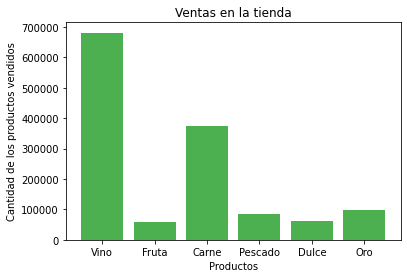

In [13]:
#Creamos la grafica de barras sobre la compra de los productos
valores = valores[["productos", "cantidad"]]
x = valores.productos
y = valores.cantidad
plt.bar(x, y, color = "#4CAF50")
plt.title("Ventas en la tienda")
plt.xlabel("Productos")
plt.ylabel("Cantidad de los productos vendidos")
plt.show()

En la grafica podemos apreciar que el producto que más se vende en la tienda es el Vino, por lo que se puede crear una campaña para tener más cliente en ese producto o se puede reforzar más en los productos que no tienen tanta venta, pero para eso, necesitamos verificar de que forma se estan vendiendo esos productos



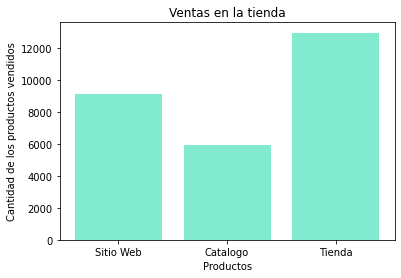

In [14]:
#Creamos la grafica de barras donde detectamos donde se compra más
#valores = valores[["productos", "cantidad"]]
x = ['Sitio Web', 'Catalogo', 'Tienda']
y = [data['NumWebPurchases'].sum(), data['NumCatalogPurchases'].sum(), data['NumStorePurchases'].sum()]
plt.bar(x, y, color = "#82eace")
plt.title("Ventas en la tienda")
plt.xlabel("Productos")
plt.ylabel("Cantidad de los productos vendidos")
plt.show()

Como podemos apreciar, en la tienda se presentan más ventas presenciales, por eso la tienda requiere realizar una marketing digital para aumentar las ventas de forma digital.

In [19]:
#Sacamos el total de compras
purchases_col=[col for col in data.columns if 'Purchase' in col]#variable para las columnas que contienen la palabra 'Purchase' sumar aplicado en forma de filas.
data['TotalPurchases']=data[purchases_col].sum(axis=1)

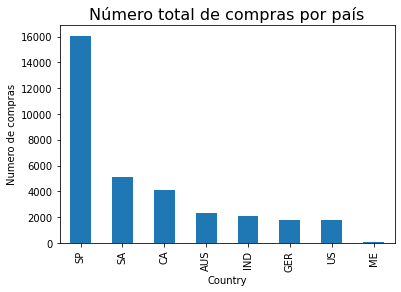

In [23]:
#Agrupamos los datos para sacar el total de compras por el país
data.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Número total de compras por país', size=16)
plt.ylabel('Numero de compras')

In [18]:
#Creamos un mapa donde se visualice cada país y los valores de compra
data['Country'].unique()

#Creamos mascaras para los diferentes valores
data['paises'] = None

In [ ]:
#